In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [2]:
# Define data generators for train, validation and test sets
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
    r"D:\Jwalitha\Projects\Python\AIML\Machine learning projects\Alzhiemers\Dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    r"D:\Jwalitha\Projects\Python\AIML\Machine learning projects\Alzhiemers\Dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)



Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [3]:
# Get the class indices from the training generator
class_indices = train_generator.class_indices

# Extract class names
class_names = list(class_indices.keys())

print("Class indices:", class_indices)
print("Class names:", class_names)


Class indices: {'Mild_Demented': 0, 'Moderate_Demented': 1, 'Non_Demented': 2, 'Very_Mild_Demented': 3}
Class names: ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


In [4]:
# Define a Sequential model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])  

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10


161/161 [==============================] - 283s 2s/step - loss: 0.4233 - accuracy: 0.5532 - val_loss: 0.5654 - val_accuracy: 0.3659
Epoch 2/10
161/161 [==============================] - 237s 1s/step - loss: 0.2649 - accuracy: 0.7772 - val_loss: 0.5025 - val_accuracy: 0.5450
Epoch 3/10
161/161 [==============================] - 138s 856ms/step - loss: 0.1274 - accuracy: 0.9170 - val_loss: 0.7537 - val_accuracy: 0.5567
Epoch 4/10
161/161 [==============================] - 140s 867ms/step - loss: 0.0385 - accuracy: 0.9814 - val_loss: 0.7143 - val_accuracy: 0.6310
Epoch 5/10
161/161 [==============================] - 138s 857ms/step - loss: 0.0123 - accuracy: 0.9955 - val_loss: 0.8849 - val_accuracy: 0.6239
Epoch 6/10
161/161 [==============================] - 136s 845ms/step - loss: 0.0075 - accuracy: 0.9990 - val_loss: 0.9586 - val_accuracy: 0.6419
Epoch 7/10
161/161 [==============================] - 139s 863ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.9055 - val

In [7]:
model.save('Alzheimer.h5')

D:\Jwalitha\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model('Alzheimer.h5')
print("Model Loaded")

Model Loaded


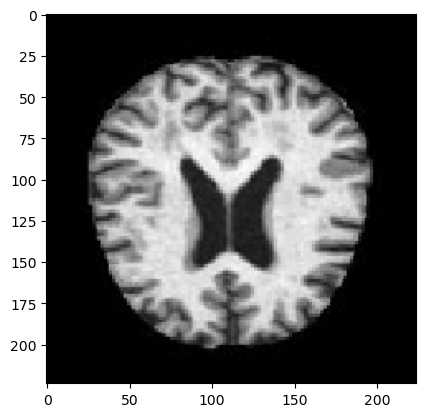

1/1 [==============================] - 0s 29ms/step
[[5.7667728e-24 2.2080815e-26 1.0000000e+00 3.6399711e-25]]


In [16]:
# Load and view the image
from matplotlib import pyplot as plt
test_image_path = r"D:\Jwalitha\Projects\Python\AIML\Machine learning projects\Alzhiemers\Dataset\Non_Demented\non_19.jpg"
img = image.load_img(test_image_path, target_size=(224, 224))

plt.imshow(img)
plt.axis()
plt.show()

#convert image into array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize the pixel values


# Make predictions
prediction = model.predict(img_array)
# Print the prediction
print(prediction)

In [15]:
#interprete the results
prediction = model.predict(img_array)
ind = np.argmax(prediction[0])
print(class_names[ind])

1/1 [==============================] - 0s 26ms/step
Non_Demented
